In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

2024-01-18 21:47:30.565459: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-18 21:47:30.565491: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-18 21:47:30.566310: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-18 21:47:30.571978: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-18 21:47:31.577485: W tensorflow/compiler/tf2

In [2]:
# save the figure
flag_save = False

In [3]:
target_dir = "./out/"
for name in sorted(os.listdir(target_dir)):
    print(name)

2023-12-04_18-15-30_df8-9_15it_0.33ts
2023-12-08_18-44-13_df8-9_500it_0.33ts
2023-12-09_18-32-28_df1-2-3-4-5-6-7-8-9-10_1it-PRE-nn2
2023-12-09_18-40-50_df1-2-3-4-5-6-7-8-9-10_1it-PRE-nn2
2023-12-09_21-54-43_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn2
2023-12-10_01-23-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn4
2023-12-10_11-38-47_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10
2023-12-21_17-19-18_df1-2-3-4-5-6-7-8-9-10-PRE-LINLOG
2023-12-21_17-39-01_all
2023-12-21_17-41-28_500it-PRE-nn-all
2023-12-25_10-54-47_500it-PRE-nn-all
old


## Loading info

In [4]:
# NN
dir_nn2 = "2023-12-09_21-54-43_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn2"
dir_nn4 = "2023-12-10_01-23-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn4"
dir_nn10 = "2023-12-10_11-38-47_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10"

## LIN LOG
dir_linlog = "2023-12-21_17-19-18_df1-2-3-4-5-6-7-8-9-10-PRE-LINLOG"

### NN2

In [5]:
path = target_dir + dir_nn2
for name in sorted(os.listdir(path)):
    print(name)

06 NN model in whole dataset - pre NN02 - Jupyter Notebook.pdf
info_nn2.txt
model_nn2.keras


In [6]:
namefile_nn2 = "/info_nn2.txt"

In [7]:
# Construct a list for header
with open(path + namefile_nn2) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [8]:
info_nn2 = pd.read_csv(path + namefile_nn2, sep=',', usecols= header)

### NN4

In [9]:
path = target_dir + dir_nn4
for name in sorted(os.listdir(path)):
    print(name)

06 NN model in whole dataset - pre NN04 - Jupyter Notebook.pdf
info_nn4.txt
model_nn4.keras


In [10]:
namefile_nn4 = "/info_nn4.txt"

In [11]:
# Construct a list for header
with open(path + namefile_nn4) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [12]:
info_nn4 = pd.read_csv(path + namefile_nn4, sep=',', usecols= header)

### NN10

In [13]:
path = target_dir + dir_nn10
for name in sorted(os.listdir(path)):
    print(name)

06 NN model in whole dataset - pre NN10 - Jupyter Notebook.pdf
info_nn10.txt
model_nn10.keras


In [14]:
namefile_nn10 = "/info_nn10.txt"

In [15]:
# Construct a list for header
with open(path + namefile_nn10) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [16]:
info_nn10 = pd.read_csv(path + namefile_nn10, sep=',', usecols= header)

### NN info

In [17]:
# For better handling the plot
info_nn = pd.concat([info_nn2, info_nn4, info_nn10])

In [18]:
info_nn

,t_list,x_list,v_list,v0,n_scn,iter,mse,type,mse_mean,N. file,DOE,processed
0,"[239.44, 239.49, 239.54, 239.58999999999997, 2...","[array([39.95957801, 42.03637912, 44.11318023,...","[[41.5360221862793, 25.42638142521775], [36.78...",25.426381,28,500.0,1.706032,train,9.488313,1,"[1, 2, 1]",pre
1,"[310.84, 310.89, 310.93999999999994, 310.98999...","[array([57.56243538, 59.37110581, 61.17977623,...","[[36.17340850830078, 28.339874492422428], [34....",28.339874,40,350.0,0.235741,train,9.488313,1,"[1, 2, 1]",pre
2,"[52.84, 52.89, 52.940000000000005, 52.99000000...","[array([46.99583421, 48.46745506, 49.9390759 ,...","[[29.432416915893555, 35.912822353566604], [27...",35.912822,5,500.0,1.206520,train,9.488313,1,"[1, 2, 1]",pre
3,"[362.84, 362.89, 362.93999999999994, 362.98999...","[array([ 6.42715625, 8.02105359, 9.61495093,...","[[31.877946853637695, 30.31390300321738], [48....",30.313976,53,500.0,3.320242,train,9.488313,1,"[1, 2, 1]",pre
4,"[444.24, 444.28999999999996, 444.34, 444.39, 4...","[array([47.60987183, 48.71461893, 49.81936604,...","[[22.094942092895508, 28.494973095574913], [22...",28.494973,62,500.0,0.338340,train,9.488313,1,"[1, 2, 1]",pre
...,...,...,...,...,...,...,...,...,...,...,...,...
666,"[531.72, 531.77, 531.82, 531.8700000000001, 53...","[array([41.40738261, 41.88411973, 42.36085685,...","[[9.53474235534668, 28.339420318603516, 20.430...",20.430849,70,NaN,4.251004,test,3.803427,10,"[1, 10, 1]",pre
667,"[159.92, 159.97, 160.01999999999998, 160.07, 1...","[array([27.5184678 , 27.57005802, 27.62164824,...","[[1.0318043231964111, 20.430848898200367], [0....",20.430849,16,NaN,3.271203,test,3.803427,10,"[1, 10, 1]",pre
668,"[335.52000000000004, 335.57000000000005, 335.6...","[array([27.9492996 , 27.94999953, 27.95069947,...","[[0.013998721726238728, 20.430848898200367], [...",20.430849,35,NaN,5.010990,test,3.803427,10,"[1, 10, 1]",pre
669,"[475.32000000000005, 475.37000000000006, 475.4...","[array([49.61394897, 50.78115449, 51.94836002,...","[[23.3441104888916, 20.430848898200367], [18.6...",20.430849,44,NaN,3.519740,test,3.803427,10,"[1, 10, 1]",pre


### Lin Log info

In [19]:
path = target_dir + dir_linlog
for name in sorted(os.listdir(path)):
    print(name)

info_alldataset.txt
v0_df1-2-3-4-5-6-7-8-9-10_1.svg


In [20]:
namefile = '/info_alldataset.txt'

In [21]:
# get the header
with open(path + namefile) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [22]:
info_linlog = pd.read_csv(path + namefile, sep=',', usecols= header)

In [23]:
info_linlog

,t_list,x_list,v0_scn,L_scn,n_scn,N. file,LWR_flag
0,"[2.24, 2.29, 2.34, 2.39, 2.44, 2.49, 2.54, 2.5...","[array([ 6.54115583, 8.08862013, 9.63622603,...",32.524004,2.114480,0,1,Lin
1,"[16.44, 16.490000000000002, 16.54, 16.59, 16.6...","[array([25.56044125, 26.84719157, 28.1340413 ,...",27.026376,2.000000,1,1,Lin
2,"[33.440000000000005, 33.49, 33.540000000000006...","[array([29.01531893, 30.33136515, 31.64823598,...",30.000000,5.000000,2,1,Lin
3,"[37.440000000000005, 37.49, 37.540000000000006...","[array([42.18965274, 43.43449131, 44.68247025,...",29.109448,2.000000,3,1,Lin
4,"[44.24, 44.290000000000006, 44.34, 44.39, 44.4...","[array([43.43569439, 44.76042962, 46.08598381,...",29.381092,2.477765,4,1,Lin
...,...,...,...,...,...,...,...
1337,"[483.92, 483.97, 484.02, 484.07, 484.12, 484.1...","[array([48.41808799, 49.07859852, 49.71023581,...",20.562864,6.152083,69,10,Log
1338,"[531.72, 531.77, 531.82, 531.8700000000001, 53...","[array([41.40738261, 42.27069584, 43.08731731,...",16.684511,7.865350,70,10,Log
1339,"[202.52, 202.57, 202.62, 202.67000000000002, 2...","[array([28.41048427, 29.50190918, 30.56793629,...",16.839222,2.052634,71,10,Log
1340,"[342.92, 342.97, 343.02, 343.07, 343.12, 343.1...","[array([30.1618309 , 31.17852216, 32.16701988,...",9.269797,2.000000,72,10,Log


## Plot

In [24]:
ms2kmh = 3.6
DOE =[[1,2,1], [1,4,1], [1,10,1]] #Design of experiment
NUM_ITER = int(dir_nn2.split("_")[-1].split("it")[0]) #same for all the models

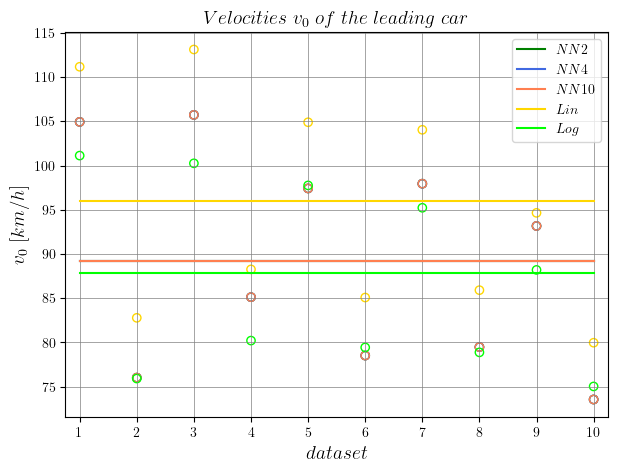

In [25]:
# Initialize the figure
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width,height))

ms2kmh = 3.6

palette = ['green', 'royalblue', 'coral']
lin_color, log_color = 'gold', 'lime'

## NN model
for step, d in enumerate(DOE):   
        
    # get the right df
#     info_dataset = info_nn.loc[info_nn['DOE'].isin([d])]
    info_dataset = info_nn.loc[info_nn['DOE'].isin([str(d)])]
    color = palette[step]

    # For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
    info_grouped = info_dataset.groupby(['N. file']).mean(numeric_only=True)
    for nf, p in info_grouped.iterrows():
        ax.scatter(nf, p['v0']*ms2kmh, facecolors='none', edgecolors=color)

    # Plot v0 mean over all dfs
    alldfs = [a for a, _ in info_grouped.iterrows()]
    v0_mean_alldfs = info_grouped['v0'].mean()*ms2kmh
    label = fr"$NN {str(d[1])}$"
    ax.plot(alldfs, [v0_mean_alldfs]*len(alldfs), color = color, label=label)
    

## LIN LOG
for key, grp in info_linlog.groupby(['LWR_flag','N. file']):
    tmp = grp.mean(numeric_only=True)
    nf = key[1]
    match key[0]:
        case 'Lin':
            ax.scatter(nf, tmp['v0_scn']*ms2kmh, facecolors='none', edgecolors=lin_color)
        case 'Log':
            ax.scatter(nf, tmp['v0_scn']*ms2kmh, facecolors='none', edgecolors=log_color)

            
for key, grp in info_linlog.groupby('LWR_flag'):
    tmp = grp.mean(numeric_only=True)
    
    xrange = [i for i in range(1,11)]
    yval = [tmp['v0_scn']*ms2kmh] * len(xrange) 
    match key:
        case 'Lin':
            ax.plot(xrange, yval, color = lin_color, label = fr"$Lin$")
        case 'Log':
            ax.plot(xrange, yval, color = log_color,  label = fr"$Log$")


ax.set_xlabel(r"$data set$",fontsize=14)
ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
ax.set_title(fr"$Velocities\ v_{0}\ of\ the\ leading\ car$",fontsize=14)

xlim = [0.75,10.25]
ax.set_xlim(xlim)
ax.set_xticks(range(1,11))
ylim = ax.get_ylim()

ax.legend()
ax.grid(color='grey', linestyle='-', linewidth=0.5);

plt.show()

## Table

In [26]:
info_linlog.groupby(['LWR_flag','N. file']).mean(numeric_only=True)[['L_scn']]

L_scn
LWR_flag N. file          
Lin      1        2.803242
         2        4.578451
         3        3.686626
         4        4.328019
         5        2.871606
         6        4.250591
         7        3.920488
         8        6.100698
         9        3.422784
         10       4.450371
Log      1        7.721689
         2        7.913829
         3        8.869658
         4        8.854229
         5        7.595487
         6        7.229299
         7        7.724031
         8        9.384782
         9        7.492782
         10       7.206939

In [27]:
for flag, grp in info_linlog.groupby('LWR_flag'):
    print(f"For {flag}-model: the average for L is {grp['L_scn'].mean()}")

For Lin-model: the average for L is 4.0302562205026895
For Log-model: the average for L is 8.089193743413015


## Prepare the out dir

In [28]:
# Create the directory..
if flag_save:
    
    ext = ".svg"
    
    # Create directory where to save the image
    now = datetime.now() 
    d = now.strftime(f"%Y-%m-%d_%H-%M-%S_all")
    
    path = 'out/' + d
    os.mkdir(path)

In [29]:
# Save figure
if flag_save:

    title = f"/v0_plot"     
    fig.savefig(path+title+ext, bbox_inches='tight')